# 8.1. Getting started with scikit-learn

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return np.exp(3 * x)

In [5]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [6]:
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + 2 * np.random.randn(len(x))

Text(0.5, 1.0, 'Generative model')

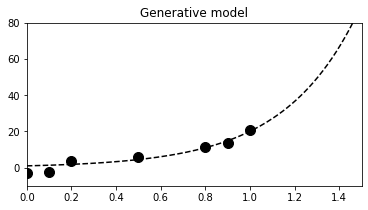

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Generative model')

In [14]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y)
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])

Text(0.5, 1.0, 'Linear regression')

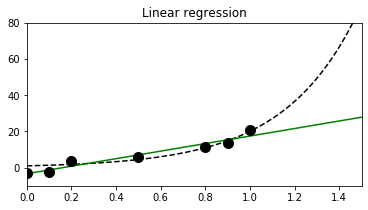

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x_tr, y_lr, 'g')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title("Linear regression")

Coefficients, degree 2:
	 9.691 11.103 0.000
Coefficients, degree 5:
	 -325.069 890.805 -789.861 243.455 4.756 0.000


Text(0.5, 1.0, 'Linear regression')

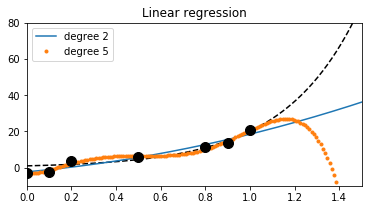

In [19]:
lrp = lm.LinearRegression()
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')

for deg, s in zip([2, 5], ['-', '.']):
    lrp.fit(np.vander(x, deg + 1), y)
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_lrp, s,
            label=f'degree {deg}')
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:\n\t',
          ' '.join(f'{c:.3f}' for c in lrp.coef_))
ax.plot(x, y, 'ok', ms=10)
ax.set_title("Linear regression")


Coefficients, degree 2: 9.86 9.94 0.00
Coefficients, degree 5: 3.45 2.81 2.60 3.70 8.43 0.00


Text(0.5, 1.0, 'Ridge regression')

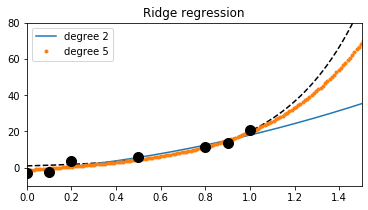

In [20]:
ridge = lm.RidgeCV()

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')

for deg, s in zip([2, 5], ['-', '.']):
    ridge.fit(np.vander(x, deg + 1), y)
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_ridge, s,
            label=f'degree {deg}')
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:',
          ' '.join(f'{c:.2f}' for c in ridge.coef_))

ax.plot(x, y, 'ok', ms=10)
ax.set_title("Ridge regression")